In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(args):
    return np.sum([x**2 for x in args])

In [3]:
dimensions = 2
boundary = (-10, 10)
particles = 20
positions = []
velocities = []

w_min = 0.01
w_max = 0.1
c1 = 0
c2 = 0
num_iters = 30

for i in range(particles):
    positions.append(np.random.uniform(boundary[0], boundary[1], dimensions))
    
positions = np.array(positions)

for i in range(particles):
    velocities.append(np.random.uniform(-1,1,dimensions))

velocities = np.array(velocities)        

In [4]:
best_locals = positions
gbest = positions[0]

for p in positions:
    if(f(p) < f(gbest)):
        gbest = p

<IPython.core.display.Javascript object>


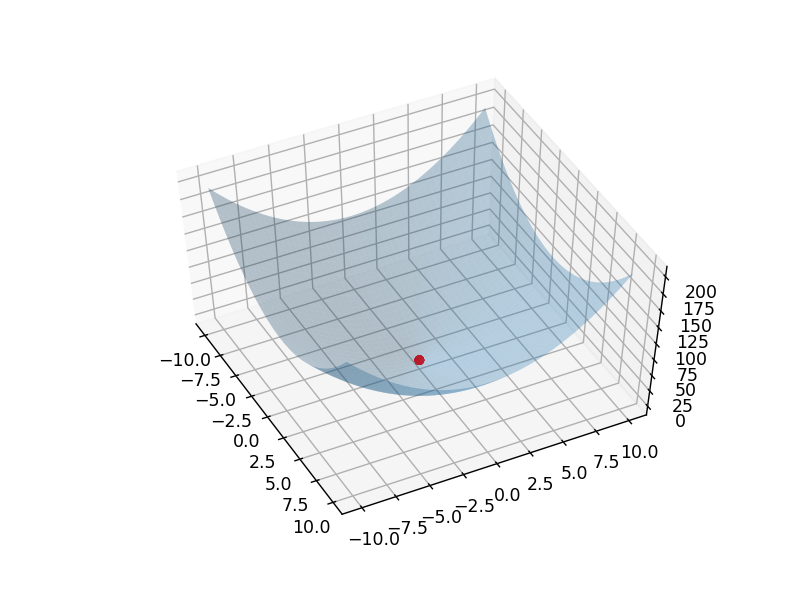

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

fig.show()

x = y = np.arange(boundary[0], boundary[1], 0.1)
surface_x, surface_y = np.meshgrid(x,y)
surface_z = np.array([f([x,y]) for x,y in zip(np.ravel(surface_x), np.ravel(surface_y))]).reshape(surface_x.shape)

for k in range(num_iters):
    for p in range(particles):
        for d in range(dimensions):
            
            c1 = 2.5 - 2*(k/num_iters)
            c2 = 0.5 + 2*(k/num_iters)
            w = w_max-((w_max-w_min)*k)/num_iters
            
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[p][d] = w*velocities[p][d] + c1*r1*(best_locals[p][d] - positions[p][d]) \
                                    + c2*r2*(gbest[d] - positions[p][d])
            
            positions[p][d] += velocities[p][d]
            
            if(f(positions[p]) < f(best_locals[p])):
                best_locals[p] = positions[p]
                
            if(f(best_locals[p]) < f(gbest)):
                gbest = best_locals[p]
                
    ax.clear()
    ax.plot_surface(surface_x, surface_y, surface_z, alpha = 0.3)
    
    positions_x = [p[0] for p in positions]
    positions_y = [p[1] for p in positions]
    positions_z = [f([x, y]) for x, y in zip(positions_x, positions_y)]
    
    ax.scatter(positions_x, positions_y, positions_z, c = '#FF0000')
    fig.canvas.draw()
        